<a href="https://colab.research.google.com/github/Rutuja-Bio-tech/EMG_AMPUTEE-V-S-HEALTHY/blob/main/Amputee_V_S_HEALTHY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving emg_datalabeled_pooja.csv to emg_datalabeled_pooja.csv
Saving emg_labeled_abhisheksir.csv to emg_labeled_abhisheksir.csv
Saving emg_labeled_aditya.csv to emg_labeled_aditya.csv
Saving emg_labeled_amputee.csv to emg_labeled_amputee (1).csv
Saving emg_labeled_rutuja.csv to emg_labeled_rutuja.csv
Saving emg_labeled_tejaswi.csv to emg_labeled_tejaswi.csv


In [ ]:
!pip install pandas openpyxl matplotlib seaborn


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load all files
files = {
    "pooja": "emg_datalabeled_pooja.csv",
    "abhishek": "emg_labeled_abhisheksir.csv",
    "aditya": "emg_labeled_aditya.csv",
    "amputee": "emg_labeled_amputee.csv",
    "rutuja": "emg_labeled_rutuja.csv",
    "tejaswi": "emg_labeled_tejaswi.csv"
}

data = {}

# Read each CSV file correctly
for name, file in files.items():
    data[name] = pd.read_csv(file)  # ✅ use read_csv for .csv files
    print(f"{name} shape: {data[name].shape}")


pooja shape: (33302, 5)
abhishek shape: (36966, 5)
aditya shape: (36617, 5)
amputee shape: (30111, 5)
rutuja shape: (21662, 5)
tejaswi shape: (33078, 5)


In [ ]:
for name, df in data.items():
    print(f"\n{name.upper()} Columns:\n", df.columns)



POOJA Columns:
 Index(['timestamp', 'emg1', 'emg2', 'emg3', 'label'], dtype='object')

ABHISHEK Columns:
 Index(['timestamp', 'emg1', 'emg2', 'emg3', 'label'], dtype='object')

ADITYA Columns:
 Index(['timestamp', 'emg1', 'emg2', 'emg3', 'label'], dtype='object')

AMPUTEE Columns:
 Index(['timestamp', 'emg1', 'emg2', 'emg3', 'label'], dtype='object')

RUTUJA Columns:
 Index(['timestamp', 'emg1', 'emg2', 'emg3', 'label'], dtype='object')

TEJASWI Columns:
 Index(['timestamp', 'emg1', 'emg2', 'emg3', 'label'], dtype='object')


In [ ]:
channel_to_check = "emg1"  # Replace with actual EMG channel name in your file

for name in data:
    if channel_to_check in data[name].columns:
        avg_signal = data[name][channel_to_check].mean()
        print(f"{name}: Avg {channel_to_check} = {avg_signal:.2f}")
    else:
        print(f"{name}: {channel_to_check} not found.")


pooja: Avg emg1 = 5986.05
abhishek: Avg emg1 = 1272.69
aditya: Avg emg1 = 2125.04
amputee: Avg emg1 = 6963.04
rutuja: Avg emg1 = 2391.60
tejaswi: Avg emg1 = 10457.76


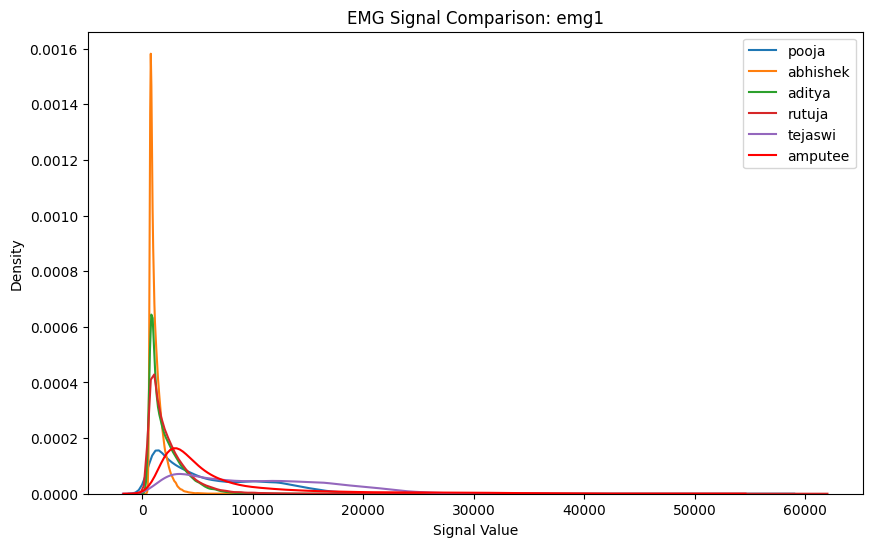

In [ ]:
plt.figure(figsize=(10, 6))

for name in data:
    if name != "amputee" and channel_to_check in data[name].columns:
        sns.kdeplot(data[name][channel_to_check], label=name)

# Plot amputee separately
if channel_to_check in data["amputee"].columns:
    sns.kdeplot(data["amputee"][channel_to_check], label="amputee", color='red')

plt.title(f'EMG Signal Comparison: {channel_to_check}')
plt.xlabel('Signal Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
for name, df in data.items():
    if "gesture" in df.columns:
        print(f"\n{name} Gesture Counts:")
        print(df["gesture"].value_counts())


In [ ]:
gesture_labels = {
    0: "rest",
    1: "peace",
    2: "rock",
    3: "stone",
    4: "paper",
    5: "scissors",
    6: "claw",
    7: "grab",
    8: "swag",
    9: "wave",
    10: "gun",
    11: "handshake",
    12: "thumbs_up",
    13: "pinch",
    14: "key",
    15: "tripod"
}


In [ ]:
# Add gesture name column to each user's dataframe
for name, df in data.items():
    if "label" in df.columns:
        df["gesture_name"] = df["label"].map(gesture_labels)



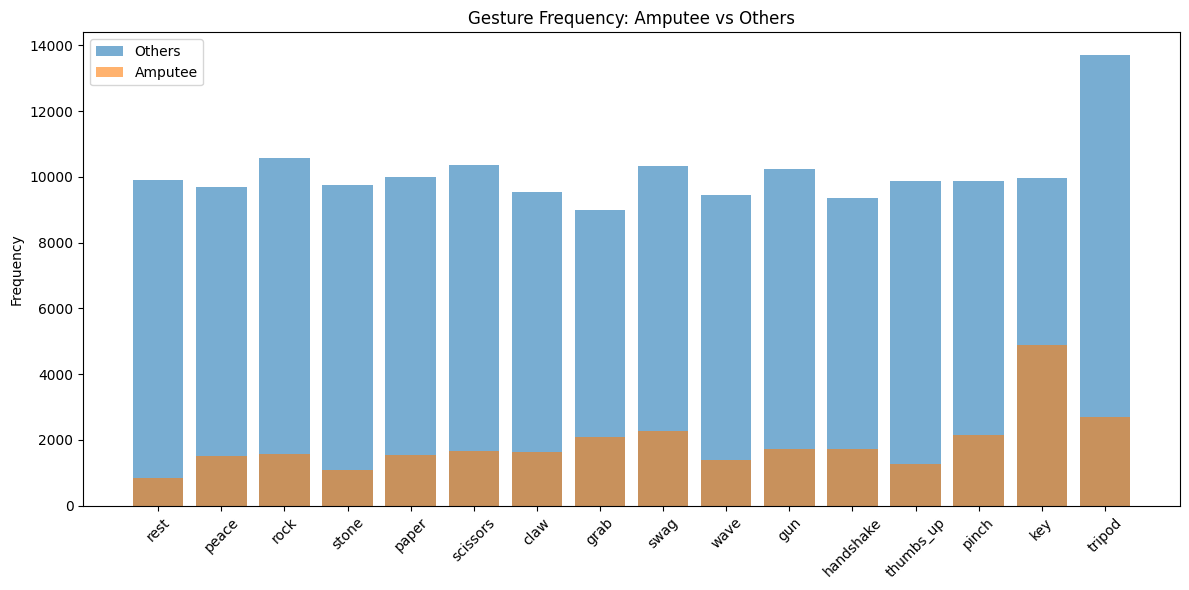

In [ ]:
import matplotlib.pyplot as plt

# Get amputee gesture counts
amputee_counts = data["amputee"]["gesture_name"].value_counts().sort_index()

# Combine others into one group
others_df = pd.concat([df for key, df in data.items() if key != "amputee"], ignore_index=True)
others_counts = others_df["gesture_name"].value_counts().sort_index()

# Ensure same index order
labels_sorted = [gesture_labels[i] for i in sorted(gesture_labels.keys())]
amputee_counts = amputee_counts.reindex(labels_sorted, fill_value=0)
others_counts = others_counts.reindex(labels_sorted, fill_value=0)

# Plot
plt.figure(figsize=(12,6))
plt.bar(labels_sorted, others_counts, label="Others", alpha=0.6)
plt.bar(labels_sorted, amputee_counts, label="Amputee", alpha=0.6)
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.title("Gesture Frequency: Amputee vs Others")
plt.legend()
plt.tight_layout()
plt.show()


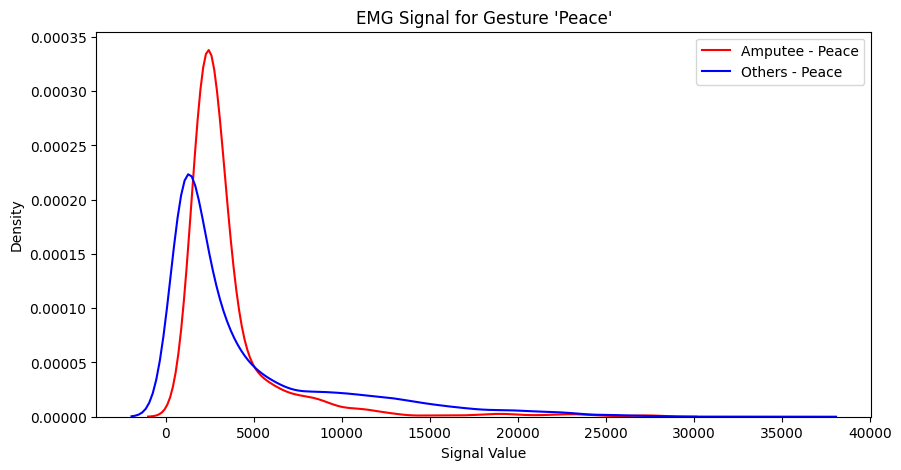

In [ ]:
channel = "emg1"  # Replace if your channel has a different name

# Filter rows with gesture = "peace"
amputee_peace = data["amputee"][data["amputee"]["gesture_name"] == "peace"]
others_peace = others_df[others_df["gesture_name"] == "peace"]

# Plot distribution
plt.figure(figsize=(10, 5))
sns.kdeplot(amputee_peace[channel], label="Amputee - Peace", color='red')
sns.kdeplot(others_peace[channel], label="Others - Peace", color='blue')
plt.title("EMG Signal for Gesture 'Peace'")
plt.xlabel("Signal Value")
plt.legend()
plt.show()

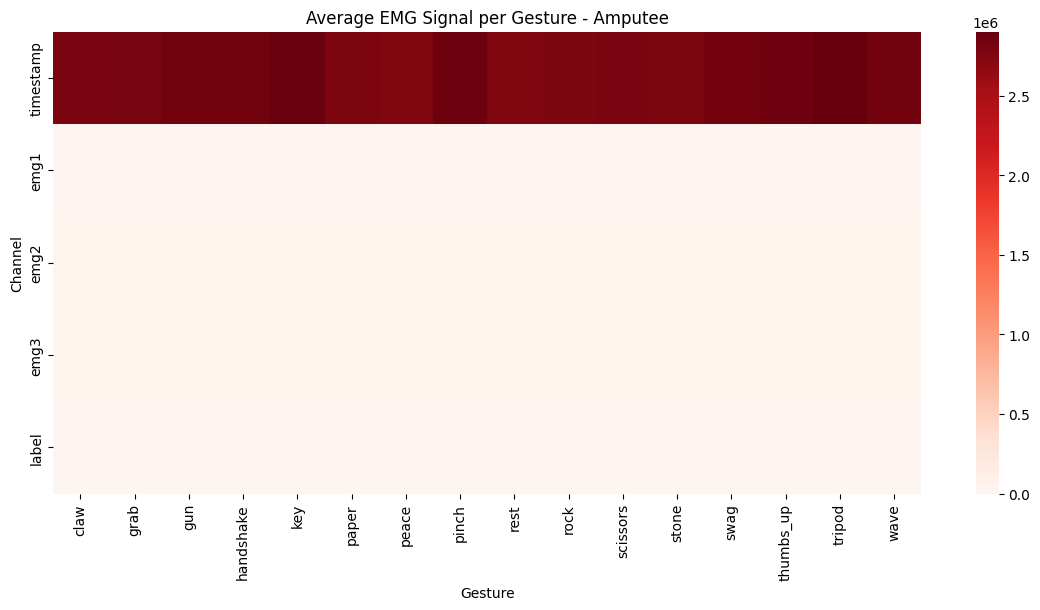

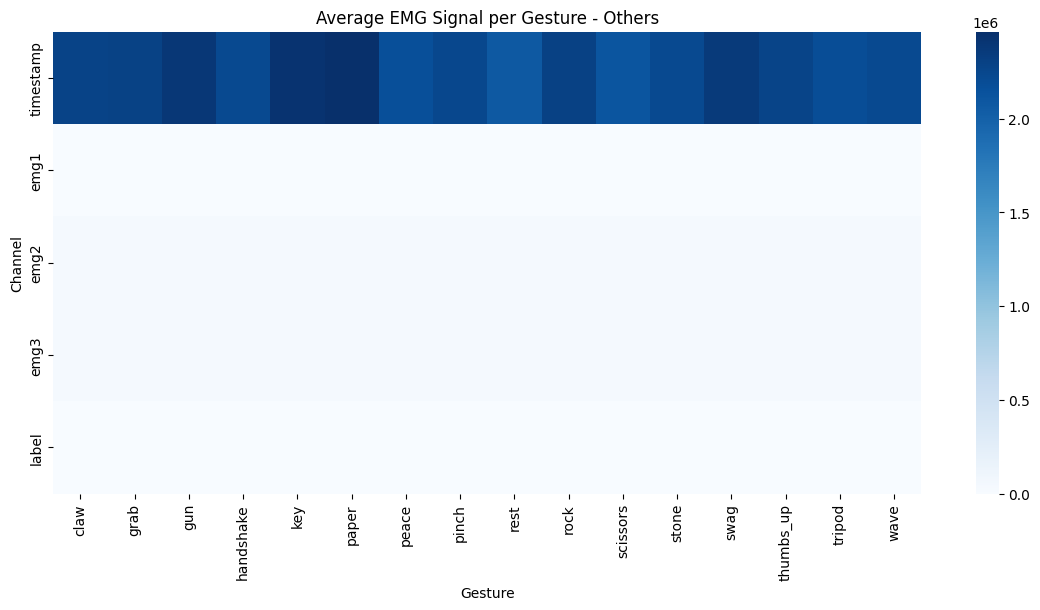

In [ ]:
# Group by gesture and take mean of signals
gesture_means_amputee = data["amputee"].groupby("gesture_name").mean(numeric_only=True)
gesture_means_others = others_df.groupby("gesture_name").mean(numeric_only=True)

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(gesture_means_amputee.T, cmap="Reds", annot=False)
plt.title("Average EMG Signal per Gesture - Amputee")
plt.xlabel("Gesture")
plt.ylabel("Channel")
plt.show()

plt.figure(figsize=(14, 6))
sns.heatmap(gesture_means_others.T, cmap="Blues", annot=False)
plt.title("Average EMG Signal per Gesture - Others")
plt.xlabel("Gesture")
plt.ylabel("Channel")
plt.show()


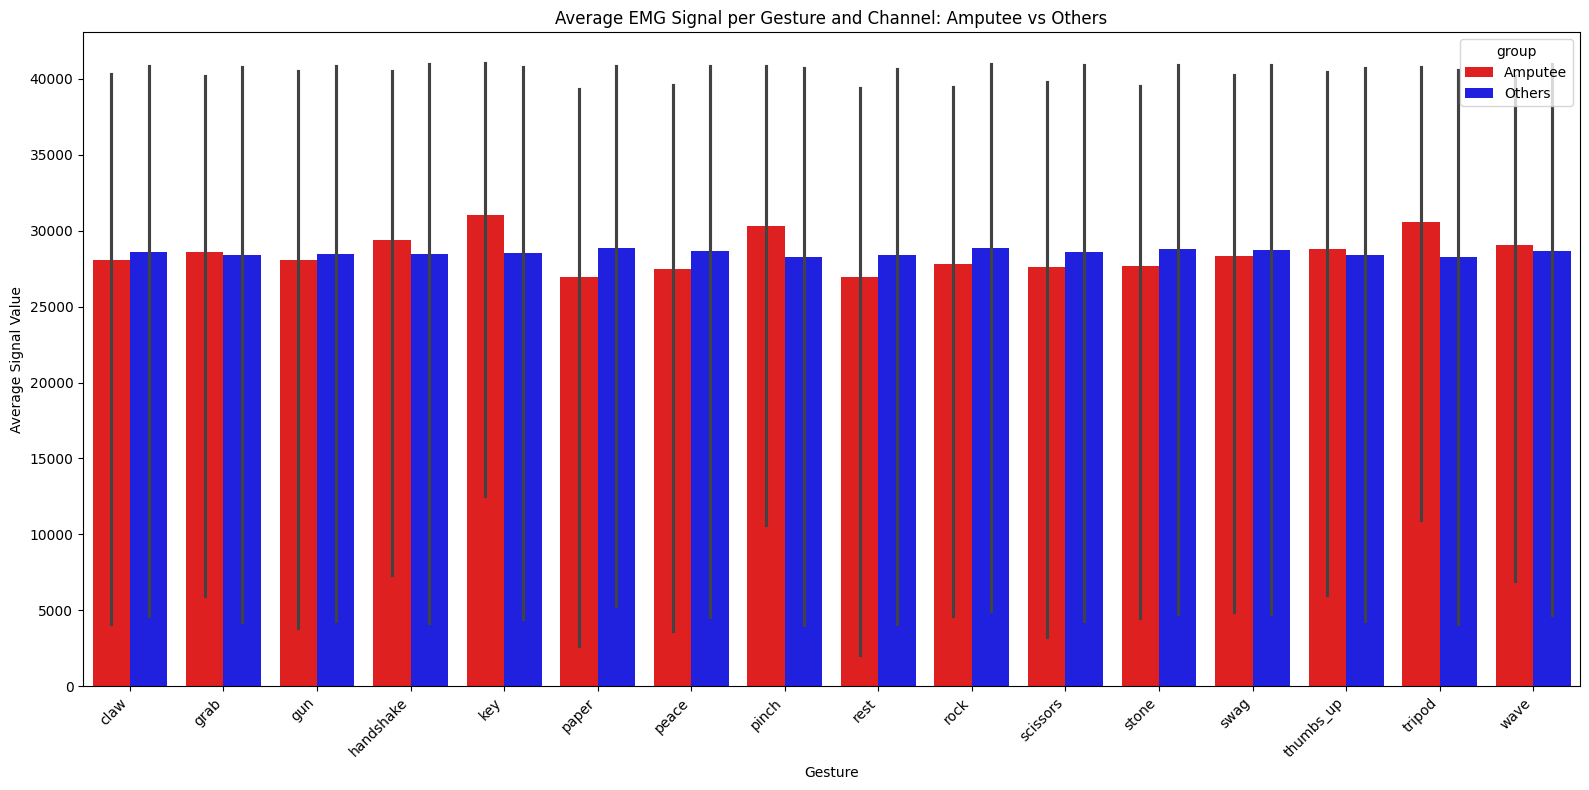

In [ ]:
# Prepare data for plotting - melt the dataframes to long format
gesture_means_amputee_melted = gesture_means_amputee.reset_index().melt(id_vars="gesture_name", var_name="channel", value_name="average_signal")
gesture_means_amputee_melted["group"] = "Amputee"

gesture_means_others_melted = gesture_means_others.reset_index().melt(id_vars="gesture_name", var_name="channel", value_name="average_signal")
gesture_means_others_melted["group"] = "Others"

# Combine data for plotting
combined_gesture_means = pd.concat([gesture_means_amputee_melted, gesture_means_others_melted])

# Filter out timestamp and label columns as they are not EMG channels
combined_gesture_means_filtered = combined_gesture_means[combined_gesture_means["channel"].isin(["emg1", "emg2", "emg3"])]

# Plot grouped bar chart
plt.figure(figsize=(16, 8))
sns.barplot(data=combined_gesture_means_filtered, x="gesture_name", y="average_signal", hue="group", palette={"Amputee": "red", "Others": "blue"})
plt.xticks(rotation=45, ha="right")
plt.title("Average EMG Signal per Gesture and Channel: Amputee vs Others")
plt.xlabel("Gesture")
plt.ylabel("Average Signal Value")
plt.tight_layout()
plt.show()